In [1]:
class Activity:
    def __init__(self, name, start, finish):
        self.name = name
        self.start = start
        self.finish = finish
    
def greedy_activity_selector(activity_list):
    """
    Implements an iterative greedy algorithm to solve the activity-selection problem (making use of NO recursive calls). 
    See GREEDY-ACTIVITY-SELECTOR in Cormen et al., p.421
    -----------
    Parameters:
    - activity_list: list of activities, instances of Activity, already sorted by finish times
    Returns:
    - out_list: the longest list possible of mutually compatible activities.
    """
    n = len(activity_list)
    A = [activity_list[0]]
    k = 0
    for i in range(1,n):
        if activity_list[i].start >= activity_list[k].finish:
            A.append(activity_list[i])
            k = i
    return A

In [12]:
def recursive_activity_selector(activity_list, k, n):
    """
    Implements a recursive greedy algorithm to solve the activity-selection problem. 
    See RECURSIVE-ACTIVITY-SELECTOR in Cormen et al., p.419. 
    Note that in Cormen et al., the call that solves the entire problem is the call with k=0. Because of the 0-indexing scheme in Python, the call that solves 
    the entire problem in your coding solution is with k=-1 (i.e., recursive_activity_selector(activity_list, -1, len(activity_list)))
    ---------
    Parameters:
    - activity_list: list of activities, instances of Activity, already sorted by finish times
    - k: int, defines the subproblem S_k it is to solve (see Cormen et al.) for 
    the definition of the subproblem S_k
    - n: int, the size n of the original problem
    
    Returns:
    - out_list: the longest list possible of mutually compatible activities. 
    """
    m = k + 1
    while m <= n and activity_list[m].start < activity_list[k].finish:
        m = m + 1
    if m <= n:
        return recursive_activity_selector(activity_list,m,n).append([activity_list[m]])
    else:                            
        return []

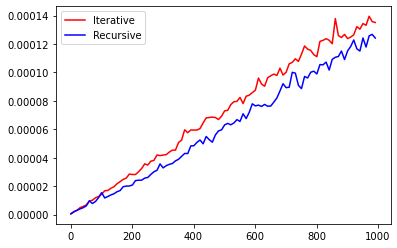

In [14]:
import random
import matplotlib.pyplot as plt
import timeit

def activity_list_gen(n):
    finish_times = random.sample(range(n*3), n)
    finish_times.sort()
    
    start_times = []
    for ftime in finish_times:
        offset = random.randint(1,5)
        start_times.append(max(ftime-offset, 0))
    
    out_list = []
    for i in range(n):
        out_list.append(Activity(str(i), start_times[i], finish_times[i]))
    
    return out_list

x_values = list(range(1,1000,10))

y_values_recur = []

for i in range(1,1000,10):
    big_times = []
    for j in range(100):
        a_l = activity_list_gen(i)
        start = timeit.default_timer()
        recursive_activity_selector(a_l, -1, len(a_l)-1)
        stop = timeit.default_timer()
        big_times.append(stop-start)
    y_values_recur.append(sum(big_times)/len(big_times))
    
y_values_iter = []

for i in range(1,1000,10):
    big_times = []
    for j in range(100):
        a_l = activity_list_gen(i)
        start = timeit.default_timer()
        greedy_activity_selector(a_l)
        stop = timeit.default_timer()
        big_times.append(stop-start)
    y_values_iter.append(sum(big_times)/len(big_times))
    
plt.plot(x_values,y_values_iter, color = 'red', label = 'Iterative')
plt.plot(x_values,y_values_recur, color = 'blue', label = 'Recursive')
plt.legend()
plt.show()